<a href="https://colab.research.google.com/github/SARANYA-4411/REALTOR-U.S-HOUSE-PRICE-PREDICTION/blob/main/python_U_S_HOUSE_PRICE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **U.S. HOUSE PRICE PREDICTION**

Context
This dataset contains Real Estate listings in the US broken by State and zip code.

Content
The dataset has 1 CSV file with 10 columns -

realtor-data.csv (300k+ entries)
status (Housing status - a. ready for sale or b. ready to build)
bed (# of beds)
bath (# of bathrooms)
acre_lot (Property / Land size in acres)
city (city name)
state (state name)
zip_code (postal code of the area)
house_size (house area/size/living space in square feet)
prev_sold_date (Previously sold date)
price (Housing price, it is either the current listing price or recently sold price if the house is sold recently)
NB: acre_lot means the total land area, and house_size denotes the living space/building area.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import relevent libraries
import pandas as pd
import numpy as np

In [ ]:
#read the csv file ie importing
df = pd.read_csv('/content/drive/MyDrive/Bagal/task 8/realtor-data (1).csv')

In [ ]:
df.head()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0


In [ ]:
df.shape

(306000, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306000 entries, 0 to 305999
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   status          306000 non-null  object 
 1   bed             250076 non-null  float64
 2   bath            251318 non-null  float64
 3   acre_lot        239877 non-null  float64
 4   city            305948 non-null  object 
 5   state           306000 non-null  object 
 6   zip_code        305803 non-null  float64
 7   house_size      252557 non-null  float64
 8   prev_sold_date  109589 non-null  object 
 9   price           306000 non-null  float64
dtypes: float64(6), object(4)
memory usage: 23.3+ MB


In [ ]:
df.describe()

,bed,bath,acre_lot,zip_code,house_size,price
count,250076.000000,251318.000000,239877.000000,305803.000000,2.525570e+05,3.060000e+05
mean,3.491347,2.574726,9.732298,2552.165724,2.225678e+03,7.680924e+05
std,2.449591,2.568545,530.827190,1629.820335,3.665834e+03,1.297715e+06
min,1.000000,1.000000,0.000000,601.000000,1.000000e+02,1.000000e+00
25%,2.000000,2.000000,0.160000,1605.000000,1.192000e+03,2.490000e+05
50%,3.000000,2.000000,0.430000,2151.000000,1.748000e+03,4.600000e+05
75%,4.000000,3.000000,1.590000,3052.000000,2.628000e+03,7.990000e+05
max,99.000000,198.000000,100000.000000,99999.000000,1.450112e+06,6.000000e+07


In [ ]:
df.describe(include = 'object')

,status,city,state,prev_sold_date
count,306000,305948,306000,109589
unique,2,979,14,5299
top,for_sale,Boston,Massachusetts,2005-07-29
freq,305240,31502,170368,158


# DATA PREPROCESSING

In [ ]:
df.duplicated().sum()

278154

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
total_missing = df.isna().sum()*100/len(df)
print('Percentage Missing Value %')
total_missing

Percentage Missing Value %


status             0.000000
bed               22.710623
bath              22.434102
acre_lot          15.754507
city               0.057459
state              0.000000
zip_code           0.100553
house_size        22.150399
prev_sold_date    64.468864
price              0.000000
dtype: float64

In [ ]:
df.shape

(27846, 10)

In [ ]:
# Mode imputation to handle missing value
df['bed'].fillna(df['bed'].mode()[0], inplace=True)
df['bath'].fillna(df['bath'].mode()[0], inplace=True)
df['acre_lot'].fillna(df['acre_lot'].mode()[0], inplace=True)
df['house_size'].fillna(df['house_size'].mode()[0], inplace=True)

In [ ]:
df = df.dropna(subset=['zip_code','city'])
df = df.drop('prev_sold_date', axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27817 entries, 0 to 305709
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   status      27817 non-null  object 
 1   bed         27817 non-null  float64
 2   bath        27817 non-null  float64
 3   acre_lot    27817 non-null  float64
 4   city        27817 non-null  object 
 5   state       27817 non-null  object 
 6   zip_code    27817 non-null  float64
 7   house_size  27817 non-null  float64
 8   price       27817 non-null  float64
dtypes: float64(6), object(3)
memory usage: 2.1+ MB


In [ ]:
df.isnull().sum()

status        0
bed           0
bath          0
acre_lot      0
city          0
state         0
zip_code      0
house_size    0
price         0
dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

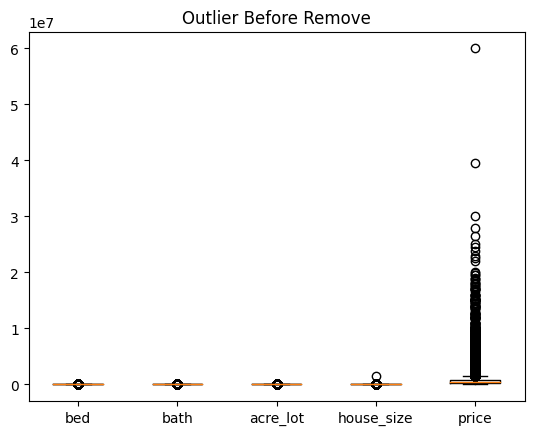

Total Row With Outlier: 27817


In [ ]:
column_num = ['bed','bath','acre_lot','house_size','price']
plt.boxplot(df[column_num])
plt.xticks([1, 2, 3, 4, 5], column_num)
plt.title('Outlier Before Remove')
plt.show()
print(f'Total Row With Outlier: {df.shape[0]}')

In [ ]:
Q1 = df[column_num].quantile(0.25)
Q3 = df[column_num].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[column_num] < (Q1 - 1.5 * IQR)) | (df[column_num] > (Q3 + 1.5 * IQR))).any(axis=1)]

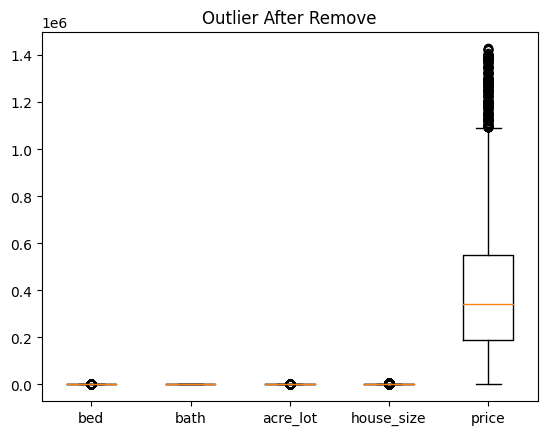

Total Row Without Outlier: 18697


In [ ]:
column_num = ['bed','bath','acre_lot','house_size','price']
plt.boxplot(df[column_num])
plt.xticks([1, 2, 3, 4, 5], column_num)
plt.title('Outlier After Remove')
plt.show()
print(f'Total Row Without Outlier: {df.shape[0]}')

In [ ]:
df.describe()

,bed,bath,acre_lot,zip_code,house_size,price
count,18697.000000,18697.000000,18697.000000,18697.000000,18697.000000,1.869700e+04
mean,3.041076,2.119270,0.621287,3273.743328,1611.669787,4.008380e+05
std,0.738137,0.735727,0.755064,2465.044477,660.852077,2.846556e+05
min,2.000000,1.000000,0.000000,601.000000,104.000000,1.000000e+00
25%,3.000000,2.000000,0.110000,1824.000000,1200.000000,1.899000e+05
50%,3.000000,2.000000,0.280000,2840.000000,1377.000000,3.399000e+05
75%,3.000000,3.000000,0.840000,4074.000000,1969.000000,5.500000e+05
max,5.000000,4.000000,3.580000,99999.000000,4008.000000,1.429000e+06


# EDA

<ipython-input-28-b5eacb9a92e6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.clustermap(df.corr(),annot=True,cmap='mako',figsize=(8, 8))


<function matplotlib.pyplot.show(close=None, block=None)>

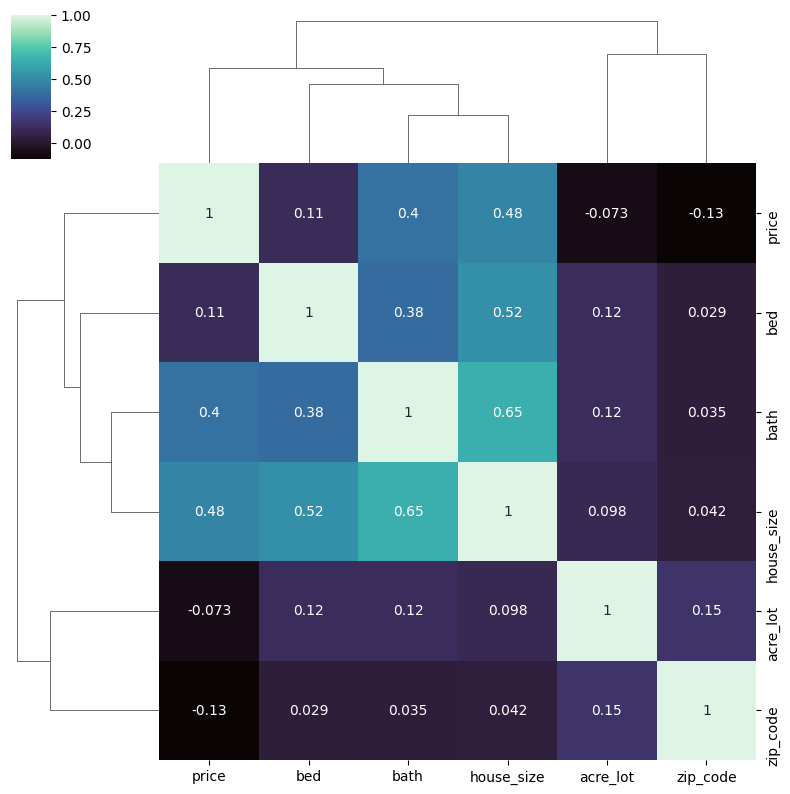

In [ ]:
sns.clustermap(df.corr(),annot=True,cmap='mako',figsize=(8, 8))
plt.show

DISTRIBUTION BY BED

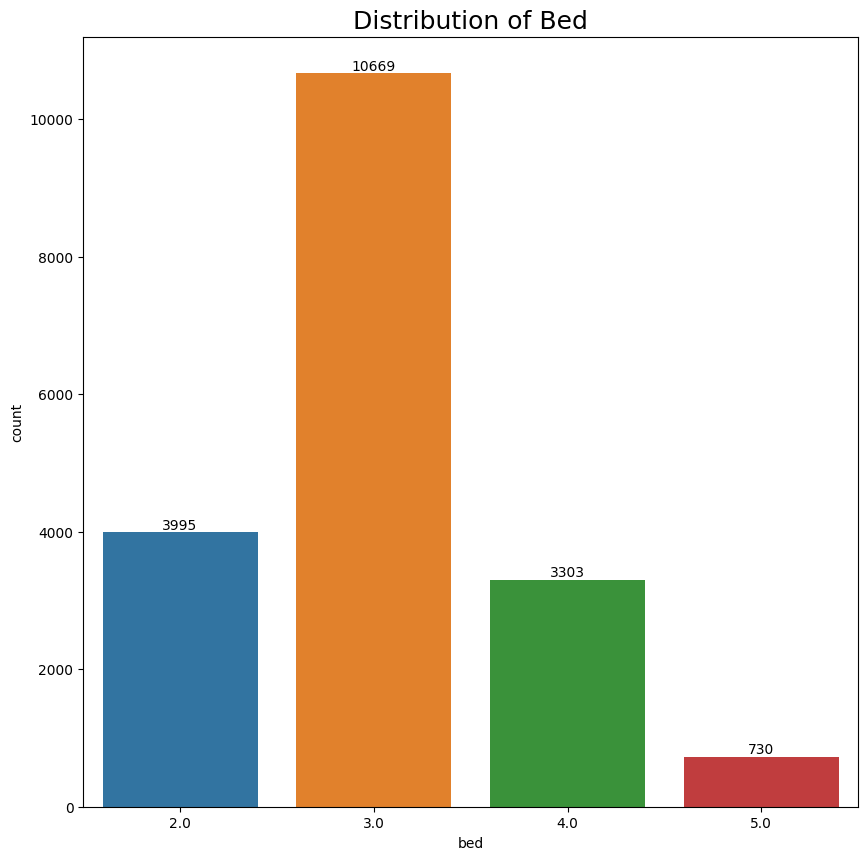

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.countplot(data=df, x='bed')
for i in ax.containers:
  ax.bar_label(i,)
plt.title('Distribution of Bed', fontsize=18)
plt.show()

DISTRIBUTION BY BATH

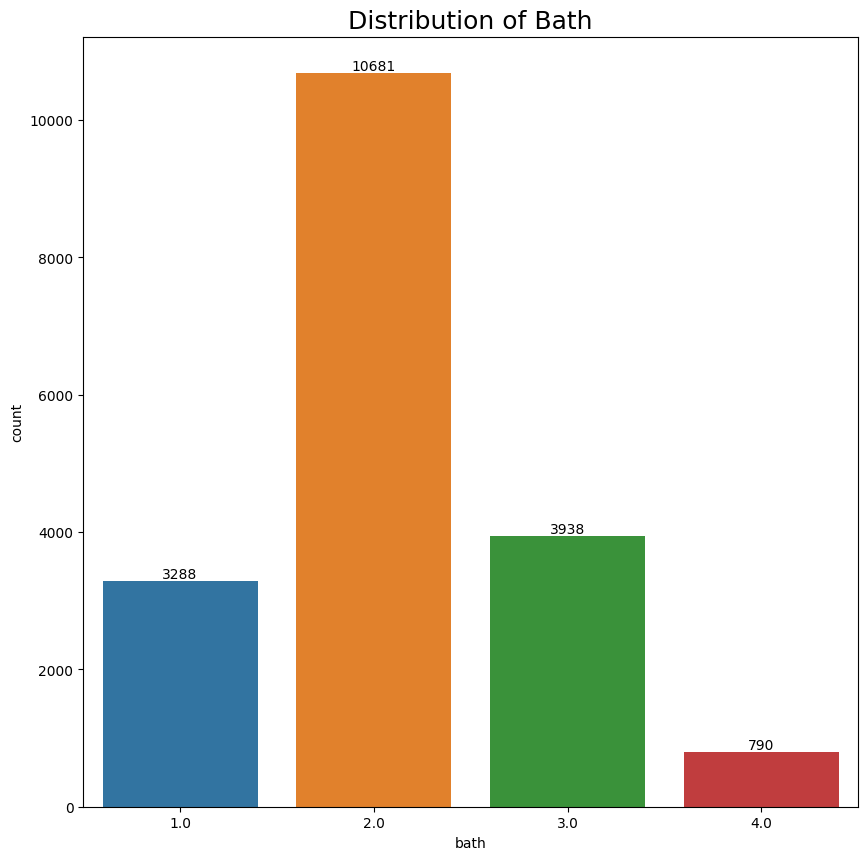

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.countplot(data=df, x='bath')
for i in ax.containers:
  ax.bar_label(i,)
plt.title('Distribution of Bath', fontsize=18)
plt.show()

DISTRIBUTION OF BED AND BATH

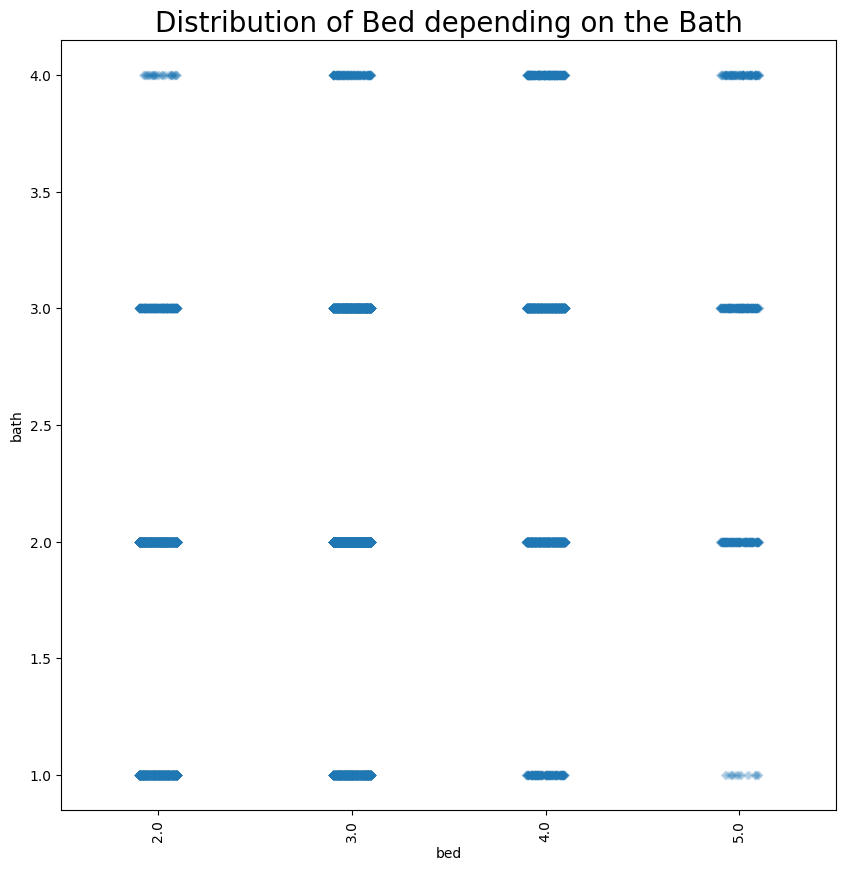

In [ ]:
plt.subplots(figsize=(10,10))
plt.xticks(rotation=90)
sns.stripplot(y='bath', x='bed', data=df, marker='D', alpha=0.2)
plt.title('Distribution of Bed depending on the Bath',fontsize = 20)
plt.show()

In [ ]:
df.groupby('bed', as_index=False).agg({'bath' : 'mean'}).sort_values('bath', ascending=False)

,bed,bath
3,5.0,2.790411
2,4.0,2.568271
1,3.0,2.064205
0,2.0,1.772466


<ipython-input-34-ad8548b76c65>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot = grouped.pivot('bed', 'bath', 'count')


<Axes: xlabel='bath', ylabel='bed'>

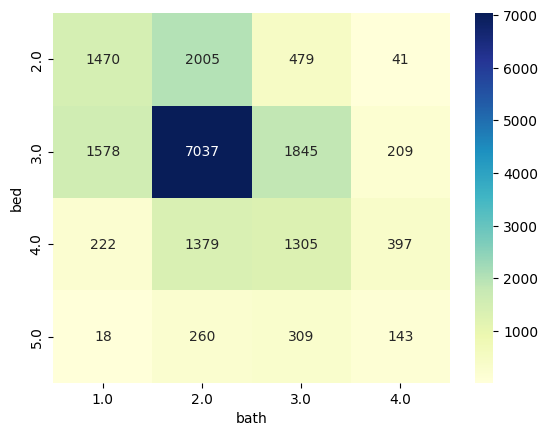

In [ ]:
grouped = df.groupby(['bed', 'bath']).size().reset_index(name='count')

pivot = grouped.pivot('bed', 'bath', 'count')

sns.heatmap(pivot, cmap='YlGnBu', annot=True, fmt='g')

DISTRIBUTION OF ACRE LOT

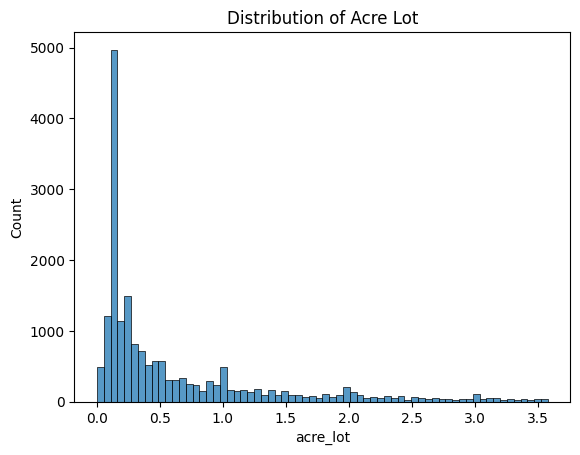

In [ ]:
sns.histplot(data=df, x="acre_lot")
plt.title('Distribution of Acre Lot')
plt.show()

In [ ]:
df['acre_lot'].value_counts()

0.11    3757
0.23     459
0.09     312
0.17     277
0.10     268
        ... 
2.79       2
2.56       2
3.42       1
2.98       1
3.53       1
Name: acre_lot, Length: 359, dtype: int64

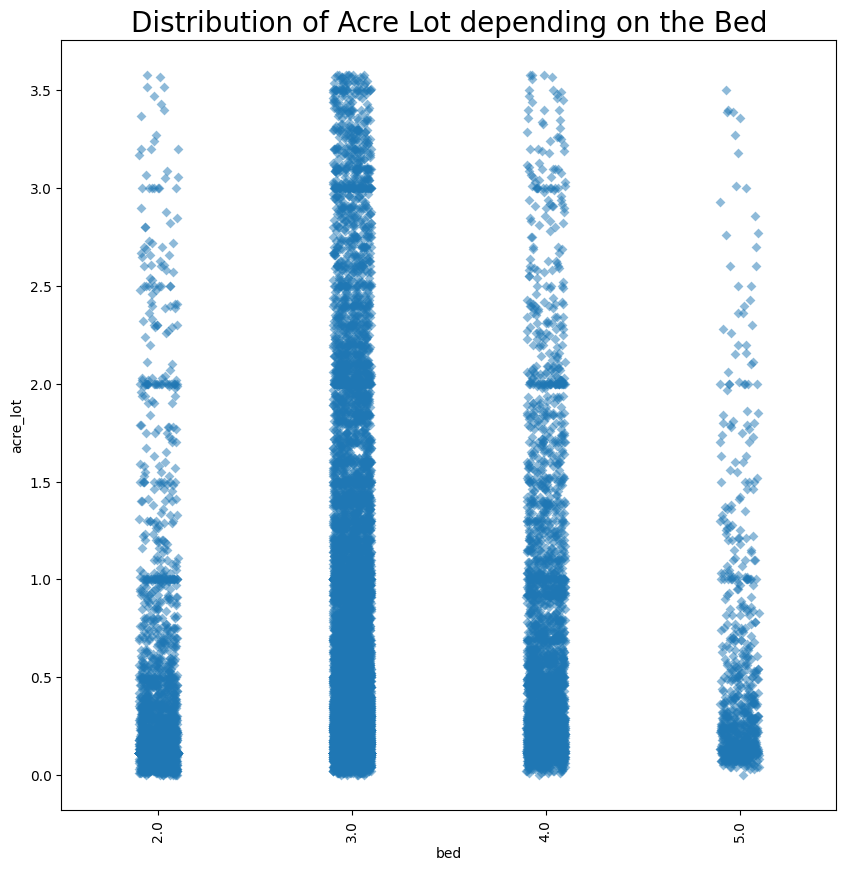

In [ ]:
plt.subplots(figsize=(10,10))
plt.xticks(rotation=90)
sns.stripplot(y='acre_lot', x='bed', data=df, marker='D', alpha=0.5)
plt.title('Distribution of Acre Lot depending on the Bed',fontsize = 20)
plt.show()

In [ ]:
df.groupby('bed', as_index=False).agg({'acre_lot' : 'count'}).sort_values('bed', ascending=False)

,bed,acre_lot
3,5.0,730
2,4.0,3303
1,3.0,10669
0,2.0,3995


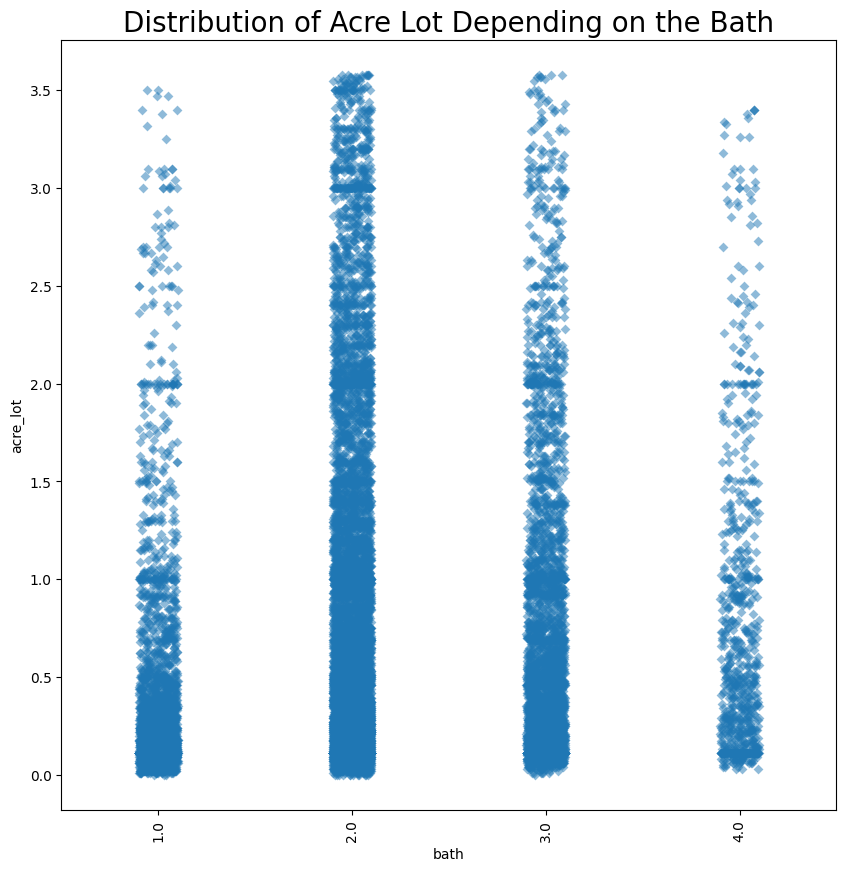

In [ ]:
plt.subplots(figsize=(10,10))
plt.xticks(rotation=90)
sns.stripplot(y='acre_lot', x='bath', data=df, marker='D', alpha=0.5)
plt.title('Distribution of Acre Lot Depending on the Bath',fontsize = 20)
plt.show()

In [ ]:
df.groupby('bath', as_index=False).agg({'acre_lot' : 'count'}).sort_values('bath', ascending=False)

,bath,acre_lot
3,4.0,790
2,3.0,3938
1,2.0,10681
0,1.0,3288


DISTRIBUTION OF THE CITY

In [ ]:
City = df['city'].value_counts().reset_index().rename(columns={'index': 'city', 'city': 'count'})
top_5 = City[:5]
fig = px.bar(top_5,'city', y='count', color='city', template='plotly')
fig.update_layout(title='Distribution of Top 5 Cities with Most Houses')
fig.update_traces(texttemplate='%{y:.}', textposition='outside')
fig.show()

In [ ]:
top10 = df.groupby('city')['bed'].sum().nlargest(10).reset_index()

fig = px.bar(top10, x='city', y='bed',color='bed', template='plotly',
             title='Top 10 Cities with the Most Total Beds')
fig.update_traces(texttemplate='%{y:.}', textposition='outside')
fig.show()

In [ ]:
top10 = df.groupby('city')['bath'].sum().nlargest(10).reset_index()

fig = px.bar(top10, x='city', y='bath',color='bath', template='plotly',
             title='Top 10 Cities with the Most Total Bath')
fig.update_traces(texttemplate='%{y:.}', textposition='outside')
fig.show()

In [ ]:
df_mean = df.groupby('city')[['bed', 'bath']].mean().reset_index()

df_mean_sort = df_mean.sort_values(by=['bed', 'bath'], ascending=False)

top10 = df_mean_sort.head(10)

fig = px.bar(top10, x='city', y=['bed', 'bath'], barmode='group',
             color_discrete_sequence=['blue', 'orange'],
             labels={'value': 'Mean Bed and Bath'},
             title='Top 10 Cities with Highest Mean Bed and Bath')
fig.show()

In [ ]:
top10 = df.groupby('city')['acre_lot'].sum().nlargest(10).reset_index()

fig = px.bar(top10, x='city', y='acre_lot',color='city', template='plotly',
             title='Top 10 Cities with Highest Most Acre Lot')
fig.update_traces(texttemplate='%{y:.2f}', textposition='outside')
fig.show()

In [ ]:
df_mean = df.groupby('city')['acre_lot'].mean().reset_index()

df_mean_sort = df_mean.sort_values(by='acre_lot', ascending=False)

top10 = df_mean_sort.head(10)

fig = px.bar(top10, x='city', y='acre_lot', color='acre_lot', template='plotly',
             title='Top 10 Cities with Highest Mean Acre Lot')
fig.update_layout(xaxis_title='City', yaxis_title='Mean Acre Lot')
fig.update_traces(texttemplate='%{y:.2f}', textposition='outside')
fig.show()

DISTRIBUTION OF THE STATE

In [ ]:
fig = px.histogram(df, x='state', nbins=25, color='state', template='plotly')
fig.update_layout(title='Distribution of State')
fig.show()

In [ ]:
city_bed_count = df.groupby(['state', 'bed']).size().reset_index(name='count')

fig = px.bar(city_bed_count, x='state', y='count', color='bed', barmode='stack',
             title='Distribution of State with Bed')
fig.show()

In [ ]:
df.groupby('state', as_index=False).agg({'bed' : 'mean'}).sort_values('bed', ascending=False)

,state,bed
6,Puerto Rico,3.153681
0,Connecticut,3.141749
10,Vermont,3.106936
5,New York,3.086826
7,Rhode Island,3.046502
1,Maine,3.023585
11,Virgin Islands,3.013514
4,New Jersey,3.000000
8,South Carolina,3.000000
9,Tennessee,3.000000


In [ ]:
city_bed_count = df.groupby(['state', 'bath']).size().reset_index(name='count')

fig = px.bar(city_bed_count, x='state', y='count', color='bath', barmode='stack',
             title='Distribution of State with Bath')
fig.show()

In [ ]:
df.groupby('state', as_index=False).agg({'bath' : 'mean'}).sort_values('bath', ascending=False)

,state,bath
4,New Jersey,3.000000
13,Wyoming,3.000000
0,Connecticut,2.219338
3,New Hampshire,2.136446
2,Massachusetts,2.125558
7,Rhode Island,2.102544
11,Virgin Islands,2.083012
1,Maine,2.058491
10,Vermont,2.037572
5,New York,2.026946


In [ ]:
df.groupby('state', as_index=False).agg({'acre_lot' : 'mean'}).sort_values('acre_lot', ascending=False)

,state,acre_lot
5,New York,1.135868
1,Maine,1.069406
10,Vermont,1.053353
9,Tennessee,0.920000
3,New Hampshire,0.898386
11,Virgin Islands,0.802529
0,Connecticut,0.721044
2,Massachusetts,0.521274
7,Rhode Island,0.393362
6,Puerto Rico,0.293256


DISTRIBUTION OF HOUSE SIZE

In [ ]:
fig = px.histogram(df, x='house_size', nbins=20)
fig.update_layout(title='Distribution of House Size')
fig.show()

In [ ]:
df['house_size'].value_counts()

1200.0    3569
960.0      104
1500.0      96
1800.0      88
2000.0      85
          ... 
3676.0       1
599.0        1
3990.0       1
1669.0       1
1363.0       1
Name: house_size, Length: 2814, dtype: int64

In [ ]:
fig = px.histogram(df, x='house_size', color='bed', nbins=25, marginal='box',
                   labels={'house_size':'House Size (sqft)'},
                   title='Distribution of House Size with Bed')

fig.show()

In [ ]:
df.groupby('bed', as_index=False).agg({'house_size' : 'mean'}).sort_values('house_size', ascending=False)

,bed,house_size
3,5.0,2517.794521
2,4.0,2224.843173
1,3.0,1494.172743
0,2.0,1252.919650


In [ ]:
fig = px.histogram(df, x="house_size", color="bath", nbins=25, marginal="box")
fig.update_layout(title="Distribution of House Size with Bath", xaxis_title="House Size", yaxis_title="Count")
fig.show()

In [ ]:
df.groupby('bath', as_index=False).agg({'house_size' : 'mean'}).sort_values('house_size', ascending=False)

,bath,house_size
3,4.0,2722.829114
2,3.0,2216.732859
1,2.0,1468.150080
0,1.0,1086.237835


In [ ]:
fig = px.scatter(df, x='bed', y='bath', size='house_size', color='bed', opacity=1,
                 marginal_x='histogram', marginal_y='histogram',
                 labels={'bed': 'Bedrooms', 'bath': 'Bathrooms', 'house_size': 'House Size'},
                 title='Distribution of House Size by Bedrooms and Bathrooms')
fig.show()

In [ ]:
fig = px.histogram(df, x='acre_lot', y='house_size', color='bed',
                   marginal='box', nbins=20, opacity=0.7,
                   title='Distribution of House Size by Acre Lot and Bed')
fig.update_layout(xaxis_title='Acre Lot',
                  yaxis_title='House Size (sqft)',
                  legend_title='Bed')
fig.show()

In [ ]:
fig = px.histogram(df, x='acre_lot', y='house_size', color='bath',
                   marginal='box', nbins=20, opacity=0.7,
                   title='Distribution of House Size by Acre Lot and Bath')
fig.update_layout(xaxis_title='Acre Lot',
                  yaxis_title='House Size (sqft)',
                  legend_title='Bath')
fig.show()

In [ ]:
df_mean = df.groupby('acre_lot')['house_size'].mean().reset_index()

fig = px.scatter(df_mean, x='acre_lot', y='house_size', title='Average House Size by Acre Lot',trendline='ols')
fig.show()

In [ ]:
df_mean = df.groupby('city')['house_size'].mean().reset_index()
df_mean_sort = df_mean.sort_values(by='house_size', ascending=False)

top10 = df_mean_sort.head(10)

fig = px.bar(top10, x='city', y='house_size', color='house_size',
             color_continuous_scale='RdYlBu_r')
fig.update_layout(title='Top 10 Cities with Highest Mean House Size',
                  xaxis_title='City', yaxis_title='Mean House Size')
fig.update_traces(texttemplate='%{y:.2f}', textposition='outside')
fig.show()


In [ ]:
df.groupby('city', as_index=False).agg({'house_size' : 'mean'}).sort_values('house_size', ascending=False)

,city,house_size
895,Woods Hole,3803.000000
166,Colrain,3645.000000
123,Carlisle,3570.666667
661,Royalston,3200.000000
43,Baltimore,3100.000000
...,...,...
622,Popponesset,796.000000
722,South Hampton,753.000000
841,West Chatham,740.000000
547,North Chatham,650.000000


In [ ]:
df_mean = df.groupby('state')['house_size'].mean().reset_index()

df_mean_sort = df_mean.sort_values(by='house_size', ascending=False)

fig = px.bar(df_mean_sort, x='state', y='house_size', color='state')
fig.update_layout(title='Top 10 States with Highest Average House Size',
                  xaxis_title='State',
                  yaxis_title='Average House Size (sqft)')
fig.update_traces(texttemplate='%{y:.1f}', textposition='outside')
fig.show()


In [ ]:
df.groupby('state', as_index=False).agg({'house_size' : 'mean'}).sort_values('house_size', ascending=False)

,state,house_size
13,Wyoming,1935.000000
3,New Hampshire,1673.070716
0,Connecticut,1659.374217
10,Vermont,1653.184971
2,Massachusetts,1649.023850
7,Rhode Island,1631.164944
5,New York,1616.449102
1,Maine,1526.938679
4,New Jersey,1500.000000
6,Puerto Rico,1435.623321


DISTRIBUTION OF PRICE

In [ ]:
fig = px.histogram(df, x="price", nbins=25, template="plotly")
fig.update_layout(title="Distribution of Price")
fig.show()

In [ ]:
df['price'].value_counts()

299900.0     201
399900.0     195
349900.0     169
225000.0     157
499900.0     156
            ... 
858995.0       1
852995.0       1
1287600.0      1
374999.0       1
29550.0        1
Name: price, Length: 2138, dtype: int64

In [ ]:
fig = px.histogram(df, x="price", color="bed", nbins=20)
fig.update_layout(title="Distribution of Price by Bed", xaxis_title="Price", yaxis_title="Count")
fig.show()

In [ ]:
df.groupby('bed', as_index=False).agg({'price' : 'mean'}).sort_values('price', ascending=False)

,bed,price
2,4.0,521313.448986
3,5.0,517965.980822
0,2.0,433623.761702
1,3.0,343249.443059


In [ ]:
fig = px.histogram(df, x="price", color="bath", nbins=20)
fig.update_layout(title="Distribution of Price by Bath", xaxis_title="Price", yaxis_title="Count")
fig.show()

In [ ]:
df.groupby('bath', as_index=False).agg({'price' : 'mean'}).sort_values('price', ascending=False)

,bath,price
3,4.0,705769.283544
2,3.0,595787.162773
1,2.0,337068.458665
0,1.0,301238.727494


In [ ]:
df_mean = df.groupby('acre_lot')['price'].mean().reset_index()

# plot mean price per acre lot
fig = px.scatter(df_mean, x='acre_lot', y='price', trendline='ols')
fig.update_layout(title='Average Price per Acre Lot', xaxis_title='Acre Lot', yaxis_title='Price')
fig.show()

In [ ]:
df_mean = df.groupby('city')['price'].mean().reset_index()

df_mean_sort = df_mean.sort_values(by='price', ascending=False)

top10 = df_mean_sort.head(10)

fig = px.bar(top10, x='city', y='price', color='city',
             labels={'city': 'City', 'price': 'Mean Price'},
             title='Top 10 Cities with the Highest Average Price')
fig.update_traces(texttemplate='%{y:.1f}', textposition='outside')
fig.show()

In [ ]:
df.groupby('city', as_index=False).agg({'price' : 'mean'}).sort_values('price', ascending=False)

,city,price
698,Seaport,1.364000e+06
24,Aquinnah,1.350000e+06
123,Carlisle,1.224333e+06
656,Rome,1.200000e+06
895,Woods Hole,1.149000e+06
...,...,...
375,Jefferson City,3.490000e+04
658,Rowe,2.800000e+04
803,Vienna,2.450000e+04
458,McCormick,1.895000e+04


In [ ]:
df_mean = df.groupby('state')['price'].mean().reset_index()

df_mean_sort = df_mean.sort_values(by='price', ascending=False)

fig = px.bar(df_mean_sort, x='state', y='price',
             title='Top 10 States with Highest Mean Price',
             labels={'state': 'State', 'price': 'Mean Price'})
fig.update_traces(texttemplate='%{y:.1f}', textposition='outside')
fig.show()


In [ ]:
df.groupby('state', as_index=False).agg({'price' : 'mean'}).sort_values('price', ascending=False)

,state,price
2,Massachusetts,545318.180182
13,Wyoming,535000.000000
7,Rhode Island,431194.594595
3,New Hampshire,359058.077969
1,Maine,349330.310377
4,New Jersey,333490.000000
0,Connecticut,292769.025067
5,New York,264458.856287
11,Virgin Islands,255152.586873
6,Puerto Rico,227720.260613


In [ ]:
df_mean = df.groupby('price')['house_size'].mean().reset_index()

fig = px.scatter(df_mean, x='price', y='house_size', trendline='ols',
                 labels={'price':'Price', 'house_size':'Mean House Size'})
fig.update_layout(title='Distribution of Mean House Size by Price')
fig.show()